In [1]:
import inspect
from supervised_models import DeepClassification, classifiers_competition, ensemble_targets
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter as sgf
import warnings
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
warnings.simplefilter("ignore")

# You need to fill here

In [3]:
# insert your CSV file
df = pd.read_csv("Proteus.csv")

# choose classifier - 0 for Linear SVM;
#                     1 for Quadratic SVM;
#                     2 for Cubic SVM;
#                     3 for Random Forest;
#                     4 for XGBoost;
Classifier = 3

# choose sacrifice rate - range from 0.00 to 0.99
Sacrifice = 0.00

# choose maximum difference between Sensitivity and Specificity - range from 0.00 to 0.99
delta = 0.25

In [4]:
df.head()

,ceftazidime,ciprofloxacin,gentamicin,1801.264,1799.335,1797.407,1795.478,1793.55,1791.621,1789.693,...,916.06,914.132,912.203,910.275,908.346,906.418,904.489,902.561,900.632,898.703
0,S,S,S,0.000846,0.000713,0.000610,0.000514,0.000442,0.000370,0.000318,...,0.001300,0.001302,0.001203,0.001021,0.000789,0.000554,0.000371,0.000264,0.000248,0.000318
1,S,S,S,0.000952,0.000820,0.000713,0.000605,0.000515,0.000415,0.000340,...,0.001340,0.001361,0.001262,0.001070,0.000817,0.000553,0.000343,0.000231,0.000230,0.000340
2,S,S,I,0.000909,0.000777,0.000671,0.000568,0.000483,0.000397,0.000340,...,0.001522,0.001535,0.001417,0.001196,0.000920,0.000638,0.000405,0.000267,0.000246,0.000340
3,S,S,S,0.000879,0.000753,0.000657,0.000567,0.000508,0.000452,0.000414,...,0.000981,0.000982,0.000883,0.000709,0.000506,0.000326,0.000211,0.000181,0.000250,0.000414
4,S,S,S,0.000792,0.000659,0.000554,0.000463,0.000412,0.000372,0.000352,...,0.001118,0.001102,0.000985,0.000796,0.000569,0.000359,0.000218,0.000164,0.000210,0.000352


In [5]:
X = df.select_dtypes(include="float").values
classes = list(df.select_dtypes(exclude="float").columns.values)
X.shape

(360, 469)

In [6]:
classes

['ceftazidime', 'ciprofloxacin', 'gentamicin']

In [7]:
X_der = sgf(X, window_length=13, polyorder=3, deriv=2, mode="nearest")

In [8]:
classifiers =[[{'cls': SVC(probability=True), 'name': 'lSVM'}, {'parametrs': {}}],
              [{'cls': SVC(probability=True, kernel="poly", degree=2), 'name': 'qSVM'}, {'parametrs': {}}],
              [{'cls': SVC(probability=True, kernel="poly", degree=3), 'name': 'cSVM'}, {'parametrs': {}}],
              [{'cls': RandomForestClassifier(n_estimators=1000), 'name': 'Random Forest'}, {'parametrs': {}}],
              [{'cls': XGBClassifier(n_estimators=1000), 'name': 'XGBoost'}, {'parametrs': {}}]]

# Results

\//\//\//\//\//\//\//\//\//\//\//\//\//\// ceftazidime \//\//\//\//\//\//\//\//\//\//\//\//\//\//


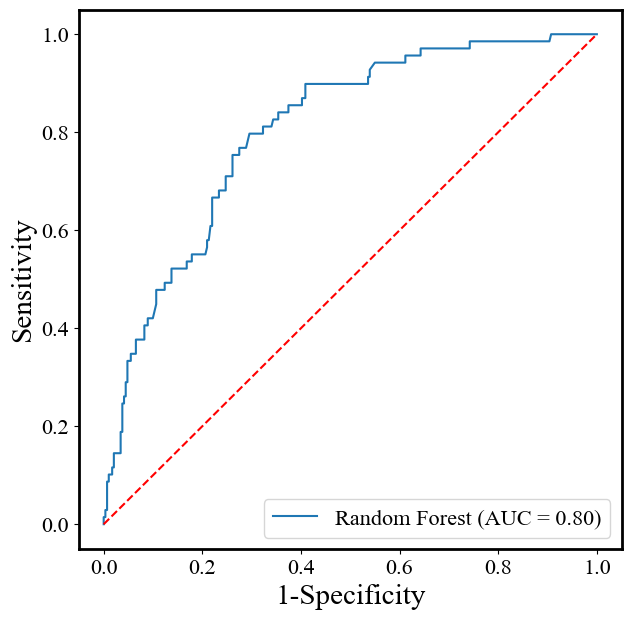

{'auc': 0.8, 'acc': 0.81, 'recall_1': 0.86, 'recall_2': 0.63, 'precision_1': 0.91, 'precision_2': 0.51}


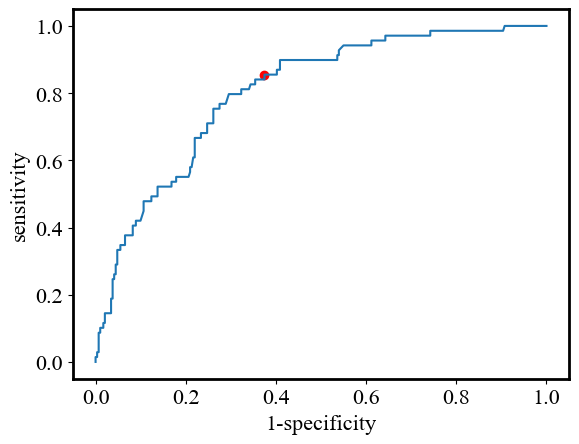

              precision    recall  f1-score   support

           0       1.00      0.03      0.05       291
           1       0.20      1.00      0.33        69

    accuracy                           0.21       360
   macro avg       0.60      0.51      0.19       360
weighted avg       0.85      0.21      0.11       360

{'feature_selection_method': SelectKBest(k='all', score_func=<function chi2 at 0x17789cd30>), 'feature_selection_method__k': 'all'}
[[  8 283]
 [  0  69]]
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
\//\//\//\//\//\//\//\//\//\//\//\//\//\// ciprofloxacin \//\//\//\//\//\//\//\//\//\//\//\//\//\//


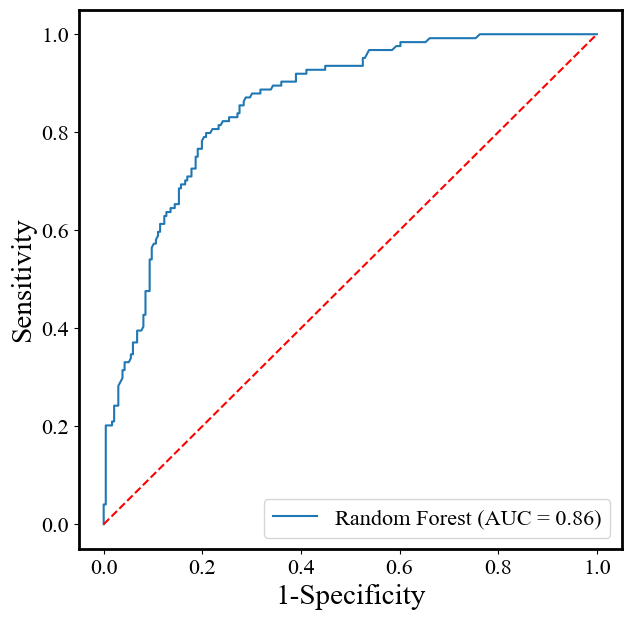

{'auc': 0.86, 'acc': 0.82, 'recall_1': 0.88, 'recall_2': 0.7, 'precision_1': 0.85, 'precision_2': 0.75}


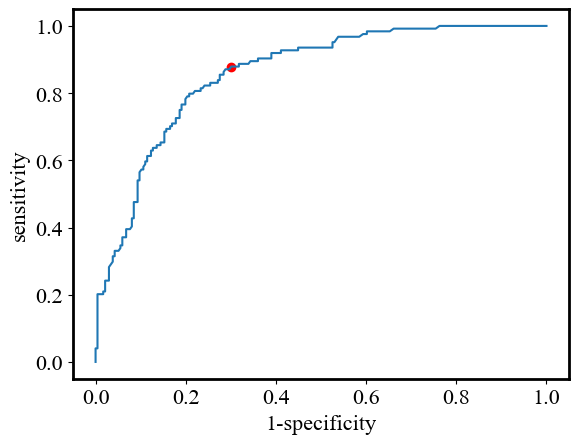

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       236
           1       0.61      0.85      0.71       124

    accuracy                           0.76       360
   macro avg       0.76      0.79      0.76       360
weighted avg       0.80      0.76      0.77       360

{'feature_selection_method': SelectKBest(k=200, score_func=<function chi2 at 0x17789cd30>), 'feature_selection_method__k': 200}
[[169  67]
 [ 18 106]]
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
\//\//\//\//\//\//\//\//\//\//\//\//\//\// gentamicin \//\//\//\//\//\//\//\//\//\//\//\//\//\//


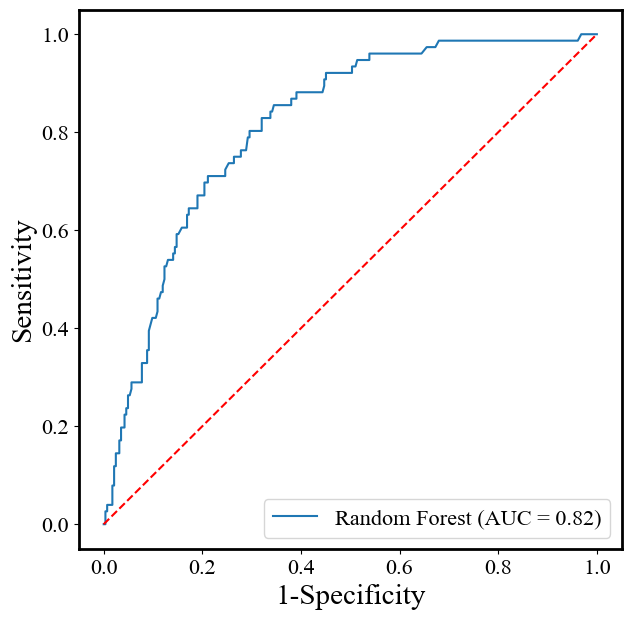

{'auc': 0.82, 'acc': 0.82, 'recall_1': 0.87, 'recall_2': 0.62, 'precision_1': 0.9, 'precision_2': 0.56}


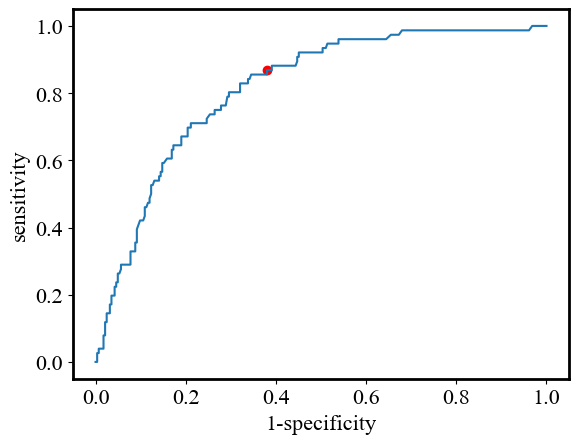

              precision    recall  f1-score   support

           0       0.96      0.08      0.15       284
           1       0.22      0.99      0.36        76

    accuracy                           0.27       360
   macro avg       0.59      0.53      0.26       360
weighted avg       0.80      0.27      0.19       360

{'feature_selection_method': SelectKBest(k=100), 'feature_selection_method__k': 100}
[[ 23 261]
 [  1  75]]
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------


In [9]:
for i in classes:
    print("\\//\\//\\//\\//\\//\\//\\//\\//\\//\\//\\//\\//\\//\\// " + i + " \\//\\//\\//\\//\\//\\//\\//\\//\\//\\//\\//\\//\\//\\//")
    y = df[i].replace(['S','I','R',], [0,1,1]).values
    y = np.reshape(y, (y.size, 1))

    df_temp = np.concatenate((X_der.copy(), y), axis=1)
    df_temp = pd.DataFrame(df_temp).dropna()
    X_temp = df_temp.iloc[:, :-1].values
    y_temp = df_temp.iloc[:, -1].values.astype(int)
    
    model = DeepClassification(X_temp, y_temp, classifier=classifiers[Classifier])
    model.grid_search(sacrifice_rate=Sacrifice, n_features_list=[50, 100, 150, 200, 250, 300, 350, 400, "all"])
    model.k_folds(shuffle=True, random_state=100, confidence_interval=True)
    model.show_roc()
    plt.show()
    print(model.optimal_cut_point_on_roc(delta_max=delta, plot_point_on_ROC=True))
    plt.show()
    print(model.class_report_)
    print(model.best_parameters_)
    print(model.confusion_mat_)
    print("-----------------------------------------------------------------------------------------------")
    print("-----------------------------------------------------------------------------------------------")